# Diffuser Configurations Analysis

Neerja Aggarwal

Oct 5th, 2021

Purpose: import the wavelength calibration files from the various diffuser configurations.  Plot as "A" matrix and calculate the coherence of the matrix.  Rate the strategies based on dispersion/incoherence. 



In [1]:
import os
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

# Load Data 

In [2]:
%matplotlib inline
# load the folder
# load the filename
folder = 'data from joe/diffuserConfigurationExamples'
filename = ['220grit_25ms_80mm_8bit.tif', '600p220grit_0deg_25ms_80mm_8bit.tif', '600p220grit_doubleRot4deg_25ms_80mm_8bit.tif']
# add other filenames

# Plot calibration data and calculate coherence

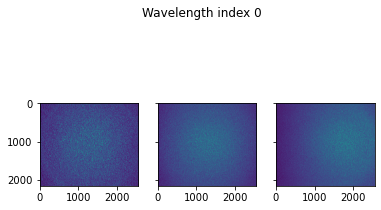

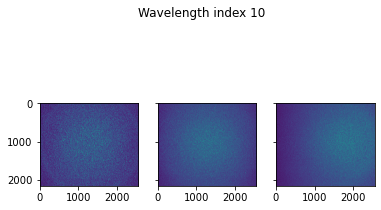

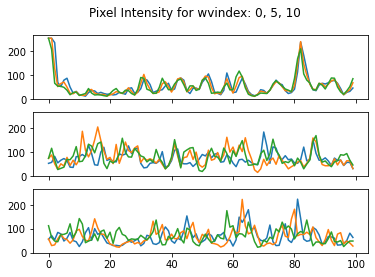

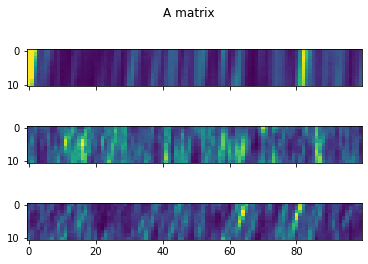

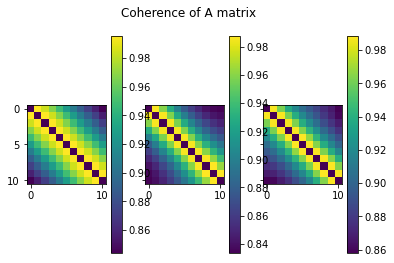

In [4]:

#prep figures to be used in for loop
fig, axs = plt.subplots(1,len(filename), sharex=True, sharey=True)
fig.suptitle('Wavelength index 0')

fig2, axs2 = plt.subplots(1,len(filename), sharex=True, sharey=True)
fig2.suptitle('Wavelength index 10')

fig3, axs3 = plt.subplots(len(filename), sharex=True, sharey=True)
fig3.suptitle('Pixel Intensity for wvindex: 0, 5, 10')

fig4, axs4 = plt.subplots(len(filename), sharex=True, sharey=True)
fig4.suptitle('A matrix')

fig5,axs5= plt.subplots(1,len(filename), sharex=True, sharey=True)
fig5.suptitle('Coherence of A matrix')

#coherence vector
u = np.zeros(len(filename))

#iterate through each configuration and plot
for k in np.arange(len(filename)):
    f = os.path.join(folder,filename[k])
    im = io.imread(f)
    A = im[:,int(im.shape[1]/2),:] #select the center row in each image

    # make into a subplot 
    axs[k].imshow(im[0,:,:])

    axs2[k].imshow(im[-1,:,:])

    axs3[k].plot(A[[0,5,10],1000:1100].T)

    axs4[k].imshow(A[:,1000:1100])
    
    (m,n) = A.shape
    intsum = np.linalg.norm(A, axis=1)
    intsummat = np.tile(intsum,(n,1))

    Anorm = np.divide(A, intsummat.T)

    #calculate the rowwise inner product 
    B = np.matmul(Anorm, Anorm.T)

    #set diagonal entries to 0
    np.fill_diagonal(B, np.amin(B))
    #calculate the highest element. 

    u[k]= np.amax(B)

    im5 = axs5[k].imshow(B)
    plt.colorbar(im5, ax=axs5[k])


# Coherence results

In [5]:
print(filename)
print(u)

['220grit_25ms_80mm_8bit.tif', '600p220grit_0deg_25ms_80mm_8bit.tif', '600p220grit_doubleRot4deg_25ms_80mm_8bit.tif']
[0.99566842 0.98803437 0.98851365]


Conclusion:

The single diffuser performs the worst in terms of dispersion/incoherence.  

The other two are better.  It's curious why the double diffuser creates a nonscaling waveform.  This is something to look into.  Also the double rotated diffuser does create the heavily dispersive pattern.  